In [2]:
%reload_ext autoreload
%autoreload 2
import collections, itertools, math
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import time
from scipy import sparse
from src.utils import *

In [115]:
# filename = "./data/0022.npz"
# filename = "./data/0027.npz"
filename = "./data/0034.npz"
t, features, linear_velocity, rotational_velocity, K, b, cam_T_imu = load_data(filename)
# features = features[:, ::3, :]

# final_xlim, final_ylim = None, None

In [116]:
from src.slam import EKFSLAM

ekf = EKFSLAM(
    n_landmarks=features.shape[1],
    robot_cam_T_imu=cam_T_imu,
    robot_cam_intrinsic_calib=K,
    robot_cam_baseline=b,
    observation_noise_covariance= 100 * np.eye(4),
    prior_landmark_covariance= 5e-3 * np.eye(3),
    process_noise_covariance= 1e-3 * np.eye(6)
)


u = np.vstack([linear_velocity, rotational_velocity])
T = linear_velocity.shape[-1]
pose = []

for i in range(1, T):
    ekf.predict(u[:, i], (t[0, i] - t[0, i-1]))
    start = time.time()
    zmap = ekf.update(features[:, :, i])
    pose.append(np.linalg.inv(ekf.xU))
    end = time.time()

    if i % 1 == 0:
        print(f'------------ {i} ----------------------')
        print('INITIALIZED LANDMARK:::', ekf.n_initialized)
        print('TIME COST::', round(end - start, 2))
    
    if (i + 1) % 5 == 0:
        visualize_trajectory_2d(np.stack(pose, -1), 
                                landmarks=ekf.xm,
                                initialized=ekf.is_initialized,
                                observed=zmap,
                                save_fig_name=f'./fig/0027/{i}.jpg',
                                xlim=final_xlim,
                                ylim=final_ylim,
                                show_navigation=True)

pose = np.stack(pose, -1) if isinstance(pose, list) else pose
visualize_trajectory_2d(pose, ekf.xm, show_ori=True)

------------ 1 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 2 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 3 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 4 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 5 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 6 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 7 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 8 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 9 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 10 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 11 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 12 ----------------------
INITIALIZED LANDMARK::: 64
TIME COST:: 0.02
------------ 

------------ 99 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.21
------------ 100 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.29
------------ 101 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.28
------------ 102 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.29
------------ 103 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.19
------------ 104 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.18
------------ 105 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.19
------------ 106 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.19
------------ 107 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.21
------------ 108 ----------------------
INITIALIZED LANDMARK::: 460
TIME COST:: 0.2
------------ 109 ----------------------
INITIALIZED LANDMARK::: 511
TIME COST:: 0.31
------------ 110 ----------------------
INITIALIZED LANDMARK::: 511

------------ 196 ----------------------
INITIALIZED LANDMARK::: 860
TIME COST:: 1.15
------------ 197 ----------------------
INITIALIZED LANDMARK::: 860
TIME COST:: 1.3
------------ 198 ----------------------
INITIALIZED LANDMARK::: 860
TIME COST:: 1.18
------------ 199 ----------------------
INITIALIZED LANDMARK::: 860
TIME COST:: 1.13
------------ 200 ----------------------
INITIALIZED LANDMARK::: 860
TIME COST:: 0.89
------------ 201 ----------------------
INITIALIZED LANDMARK::: 860
TIME COST:: 0.81
------------ 202 ----------------------
INITIALIZED LANDMARK::: 895
TIME COST:: 1.22
------------ 203 ----------------------
INITIALIZED LANDMARK::: 895
TIME COST:: 0.97
------------ 204 ----------------------
INITIALIZED LANDMARK::: 895
TIME COST:: 1.11
------------ 205 ----------------------
INITIALIZED LANDMARK::: 895
TIME COST:: 0.94
------------ 206 ----------------------
INITIALIZED LANDMARK::: 895
TIME COST:: 0.89
------------ 207 ----------------------
INITIALIZED LANDMARK::: 89

------------ 292 ----------------------
INITIALIZED LANDMARK::: 1212
TIME COST:: 1.98
------------ 293 ----------------------
INITIALIZED LANDMARK::: 1212
TIME COST:: 1.99
------------ 294 ----------------------
INITIALIZED LANDMARK::: 1212
TIME COST:: 1.88
------------ 295 ----------------------
INITIALIZED LANDMARK::: 1212
TIME COST:: 1.95
------------ 296 ----------------------
INITIALIZED LANDMARK::: 1212
TIME COST:: 1.94
------------ 297 ----------------------
INITIALIZED LANDMARK::: 1212
TIME COST:: 1.84
------------ 298 ----------------------
INITIALIZED LANDMARK::: 1212
TIME COST:: 1.98
------------ 299 ----------------------
INITIALIZED LANDMARK::: 1275
TIME COST:: 2.48
------------ 300 ----------------------
INITIALIZED LANDMARK::: 1275
TIME COST:: 3.43
------------ 301 ----------------------
INITIALIZED LANDMARK::: 1275
TIME COST:: 2.95
------------ 302 ----------------------
INITIALIZED LANDMARK::: 1275
TIME COST:: 3.46
------------ 303 ----------------------
INITIALIZED LA

------------ 388 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 4.15
------------ 389 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 4.13
------------ 390 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 4.15
------------ 391 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 4.3
------------ 392 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 4.1
------------ 393 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 4.07
------------ 394 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 3.99
------------ 395 ----------------------
INITIALIZED LANDMARK::: 1617
TIME COST:: 3.87
------------ 396 ----------------------
INITIALIZED LANDMARK::: 1662
TIME COST:: 4.47
------------ 397 ----------------------
INITIALIZED LANDMARK::: 1662
TIME COST:: 4.35
------------ 398 ----------------------
INITIALIZED LANDMARK::: 1662
TIME COST:: 4.3
------------ 399 ----------------------
INITIALIZED LANDM

------------ 484 ----------------------
INITIALIZED LANDMARK::: 2042
TIME COST:: 7.51
------------ 485 ----------------------
INITIALIZED LANDMARK::: 2042
TIME COST:: 7.48
------------ 486 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 8.55
------------ 487 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 9.54
------------ 488 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 8.28
------------ 489 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 8.27
------------ 490 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 8.51
------------ 491 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 8.56
------------ 492 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 8.55
------------ 493 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 8.27
------------ 494 ----------------------
INITIALIZED LANDMARK::: 2090
TIME COST:: 9.13
------------ 495 ----------------------
INITIALIZED LA

------------ 579 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 13.12
------------ 580 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 13.15
------------ 581 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 16.73
------------ 582 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 15.75
------------ 583 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 12.68
------------ 584 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 12.67
------------ 585 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 13.75
------------ 586 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 12.21
------------ 587 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 11.99
------------ 588 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 12.21
------------ 589 ----------------------
INITIALIZED LANDMARK::: 2424
TIME COST:: 12.19
------------ 590 ----------------------
INI

------------ 674 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 20.18
------------ 675 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 20.14
------------ 676 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 20.51
------------ 677 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 20.63
------------ 678 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 19.84
------------ 679 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 18.76
------------ 680 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 19.73
------------ 681 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 19.48
------------ 682 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 19.83
------------ 683 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 19.39
------------ 684 ----------------------
INITIALIZED LANDMARK::: 2767
TIME COST:: 19.66
------------ 685 ----------------------
INI

------------ 769 ----------------------
INITIALIZED LANDMARK::: 2937
TIME COST:: 24.85
------------ 770 ----------------------
INITIALIZED LANDMARK::: 2969
TIME COST:: 26.43
------------ 771 ----------------------
INITIALIZED LANDMARK::: 2969
TIME COST:: 40.32
------------ 772 ----------------------
INITIALIZED LANDMARK::: 2969
TIME COST:: 34.59
------------ 773 ----------------------
INITIALIZED LANDMARK::: 2969
TIME COST:: 22.29
------------ 774 ----------------------
INITIALIZED LANDMARK::: 2969
TIME COST:: 22.17
------------ 775 ----------------------
INITIALIZED LANDMARK::: 2969
TIME COST:: 28.64
------------ 776 ----------------------
INITIALIZED LANDMARK::: 2992
TIME COST:: 33.65
------------ 777 ----------------------
INITIALIZED LANDMARK::: 2992
TIME COST:: 34.04
------------ 778 ----------------------
INITIALIZED LANDMARK::: 2992
TIME COST:: 30.55
------------ 779 ----------------------
INITIALIZED LANDMARK::: 2992
TIME COST:: 23.8
------------ 780 ----------------------
INIT

KeyboardInterrupt: 

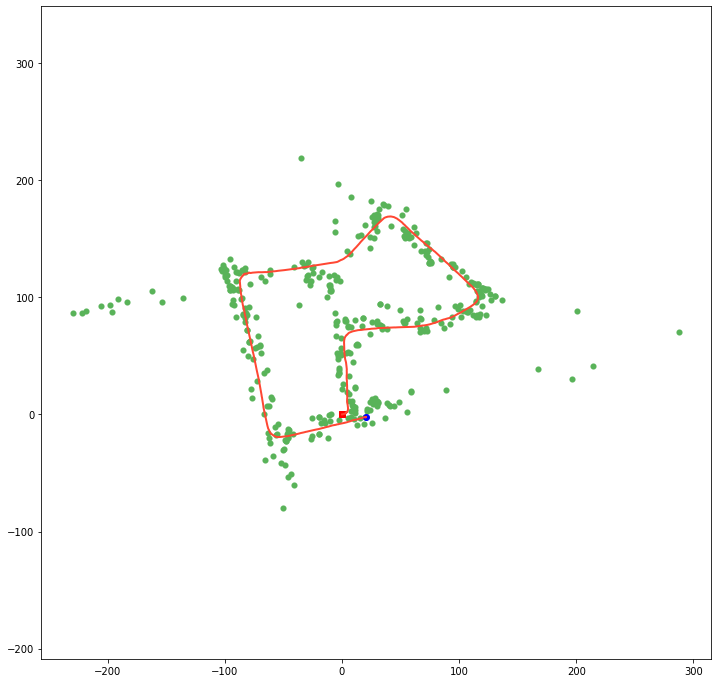

In [106]:
pose = np.stack(pose, -1) if isinstance(pose, list) else pose
fig, ax = visualize_trajectory_2d(pose, ekf.xm)

final_xlim = ax.get_xlim()
final_ylim = ax.get_ylim()